In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
data=pd.read_csv(r"C:\Users\ADMIN\Downloads\archive (6)\Churn_Modelling.csv")
data.info()
data.describe()
data.head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
data.drop("Surname",axis="columns",inplace=True)
data.drop("RowNumber",axis="columns",inplace=True)
data.drop("CustomerId",axis="columns",inplace=True)


KeyError: "['Surname'] not found in axis"

In [5]:
data.head(20)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
data['Balance'] = data['Balance'].astype(int)
data['EstimatedSalary'] = data['EstimatedSalary'].astype(int)

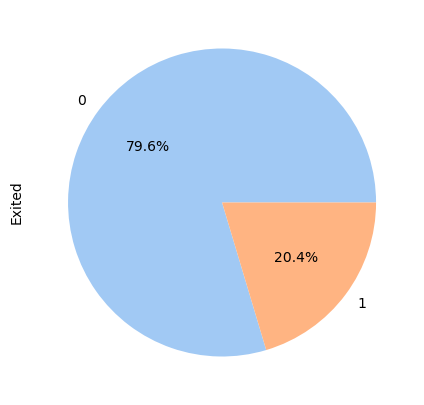

In [7]:
plt.figure(figsize=(5,5))
palette_color = sns.color_palette('pastel')
#explode = [0.1, 0.1]
data.groupby('Exited')['Exited'].count().plot.pie(colors=palette_color, autopct="%1.1f%%");

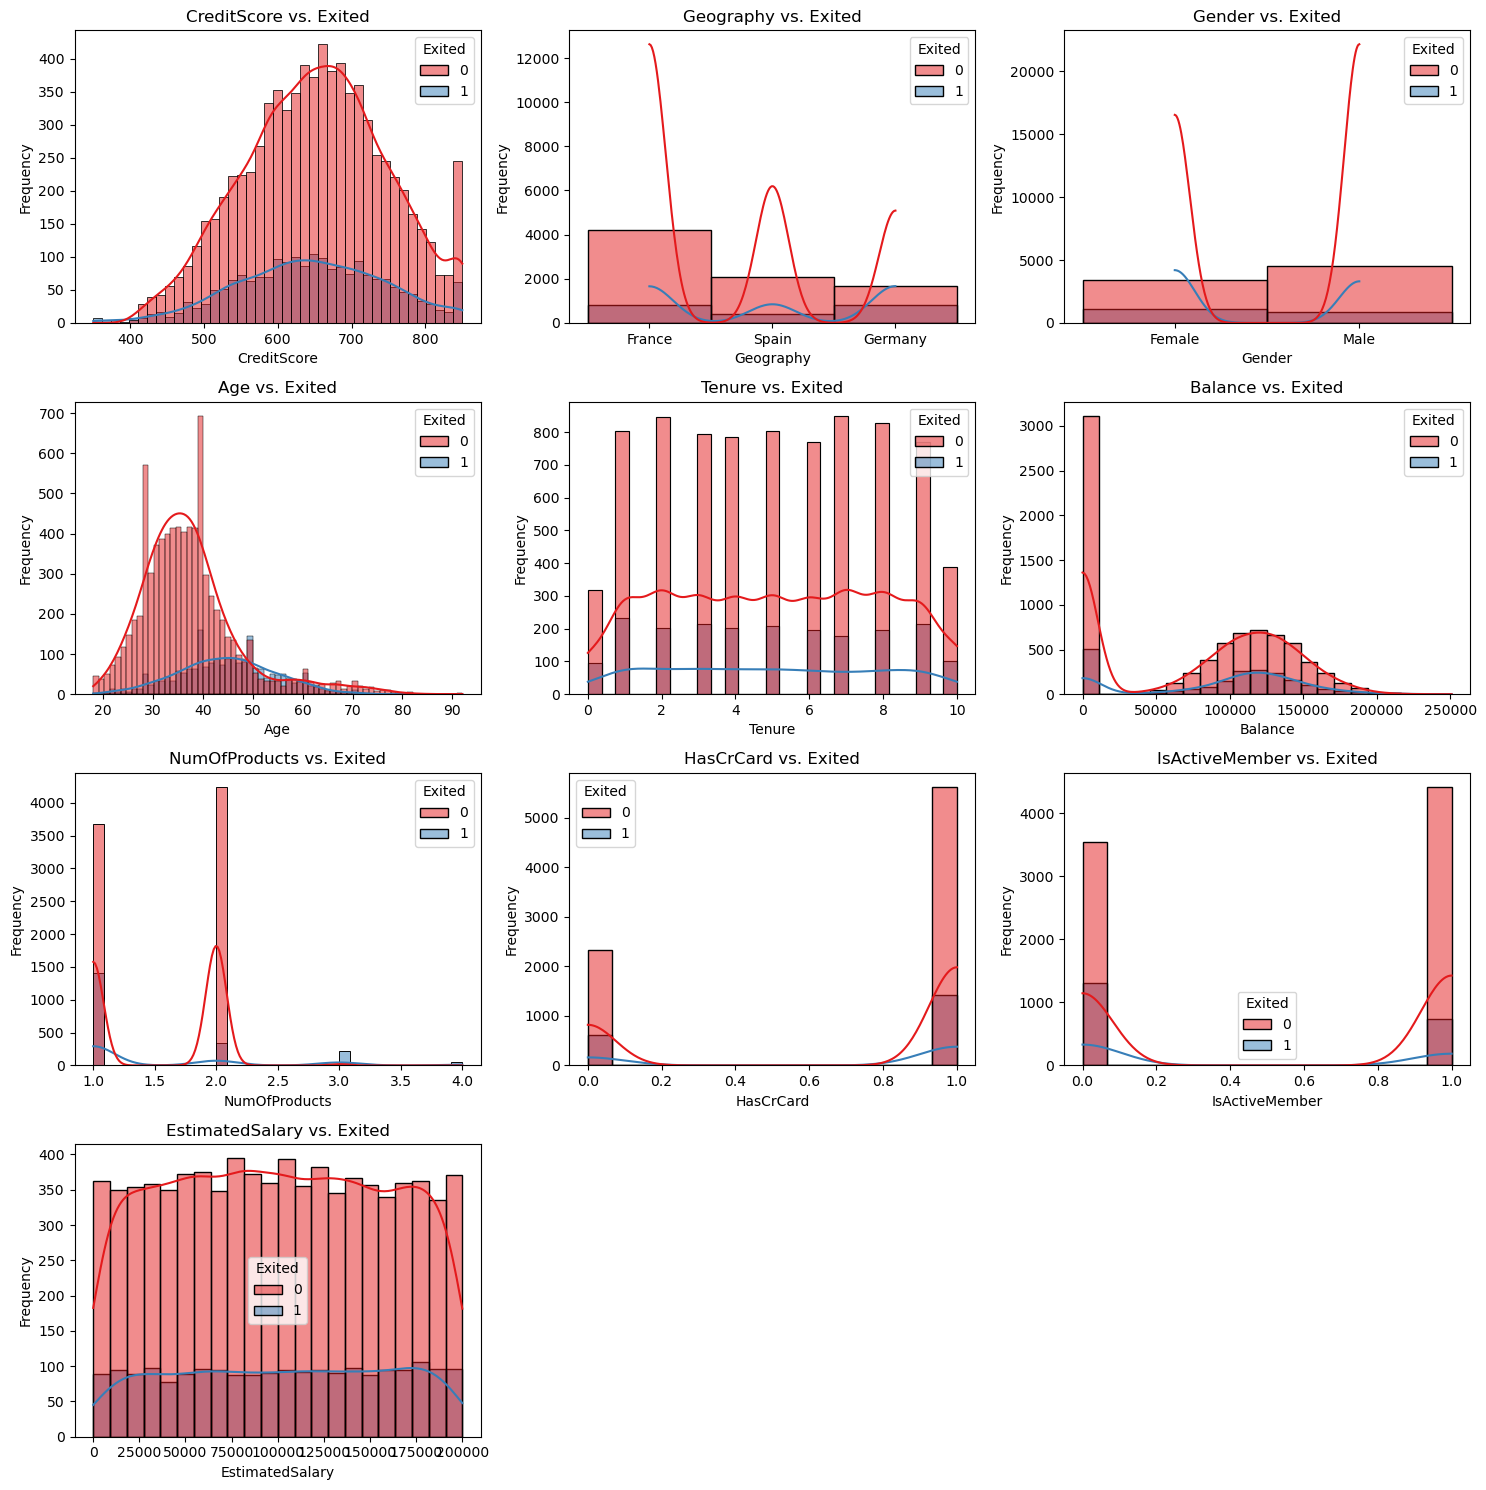

In [8]:
features = data.columns[:-1]  # Exclude the 'Exited' column

# Create subplots
fig, axes = plt.subplots(len(features)//3 + 1, 3, figsize=(15, 15))
axes = axes.flatten()

for feature, ax in zip(features, axes):
    sns.histplot(x=feature, hue='Exited', data=data, kde=True, ax=ax, palette='Set1')
    ax.set_title(f'{feature} vs. Exited')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

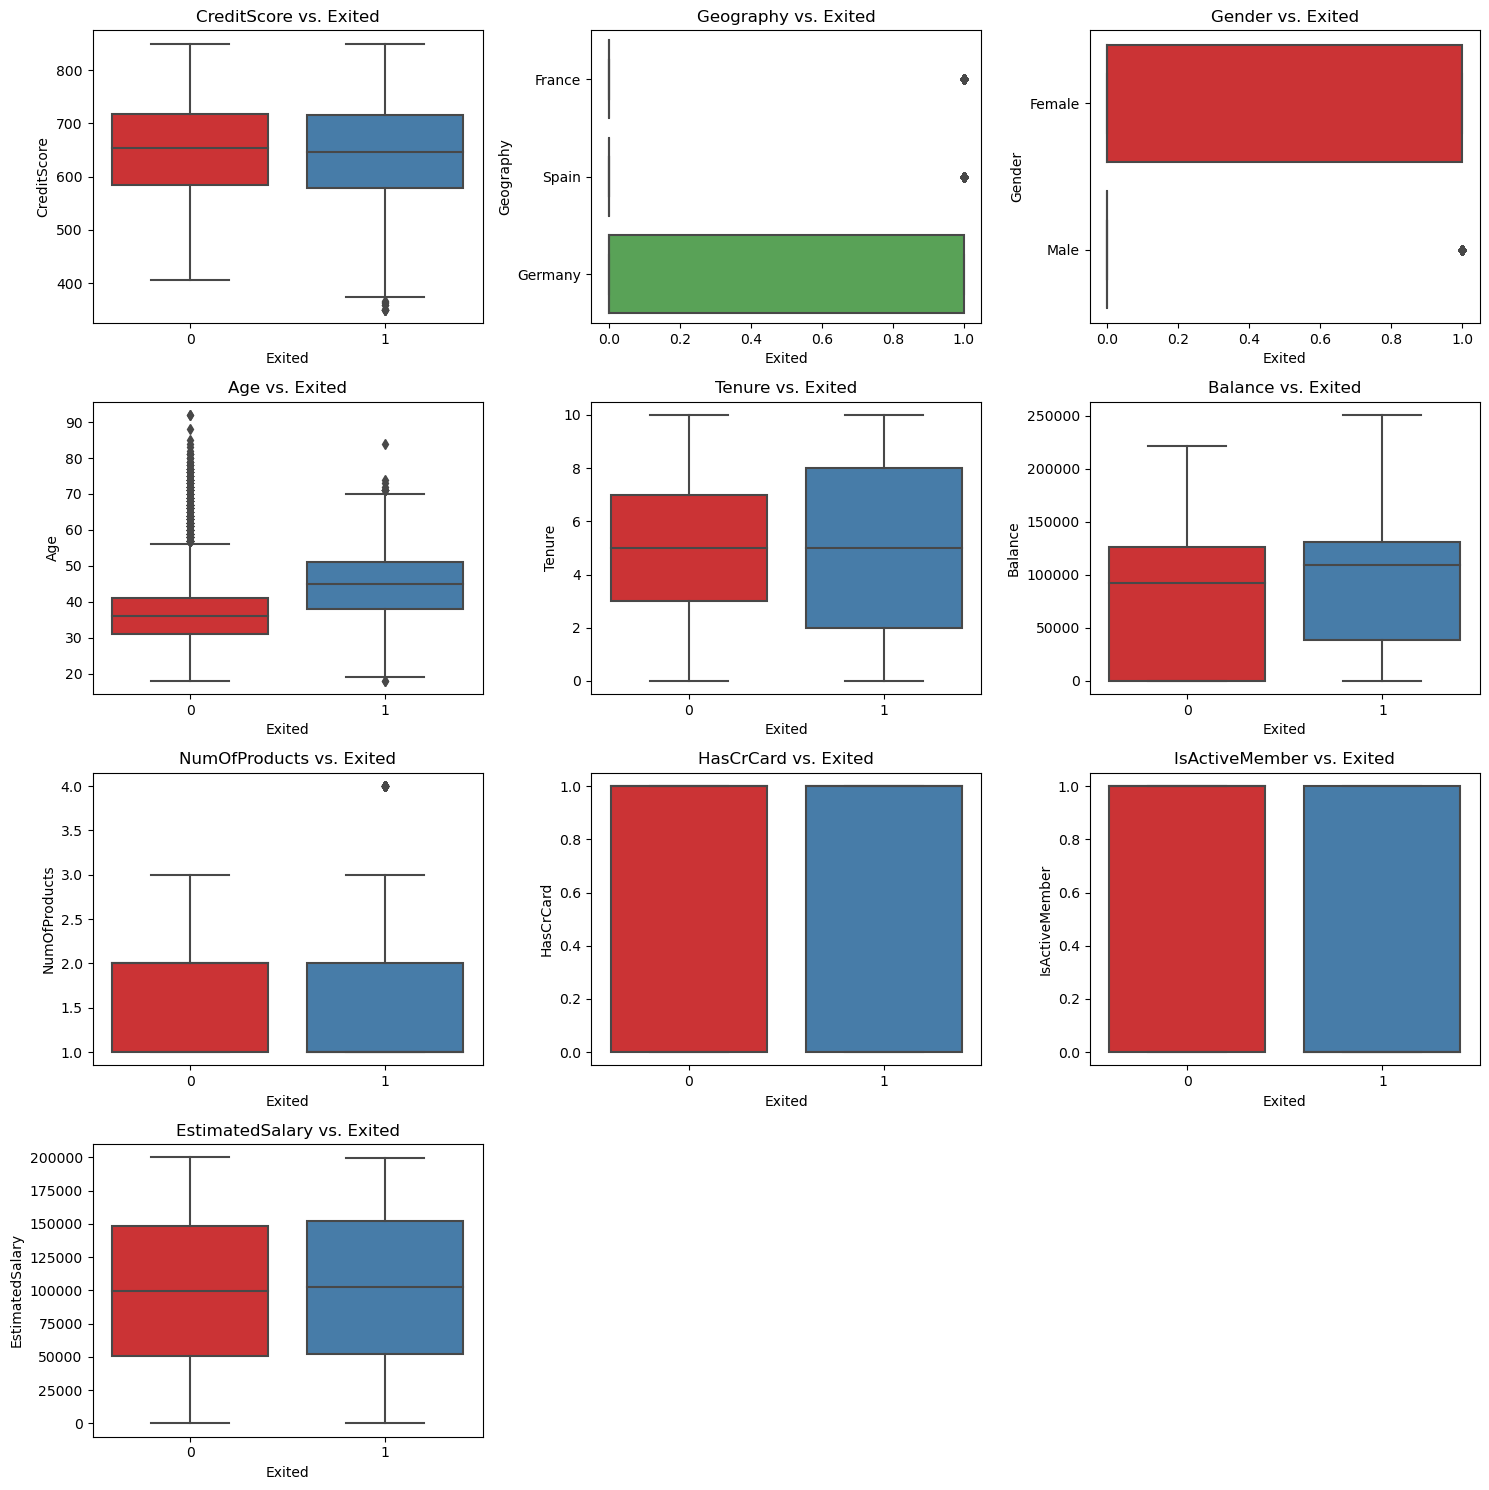

In [9]:
fig, axes = plt.subplots(len(features)//3 + 1, 3, figsize=(15, 15))
axes = axes.flatten()
for feature, ax in zip(features, axes):
    sns.boxplot(x='Exited', y=feature, data=data, ax=ax, palette='Set1')
    ax.set_title(f'{feature} vs. Exited')
    ax.set_xlabel('Exited')
    ax.set_ylabel(feature)
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])    
plt.tight_layout()
plt.show()

In [11]:
data['Gender'].replace({'Female':0,'Male':1},inplace=True)
# One-hot encode categorical variables
df = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0,1,1,1,101348,1
1,608,Spain,0,41,1,83807,1,0,1,112542,0
2,502,France,0,42,8,159660,3,1,0,113931,1
3,699,France,0,39,1,0,2,0,0,93826,0
4,850,Spain,0,43,2,125510,1,1,1,79084,0


In [12]:
x = df.drop('Exited',axis='columns')
y = df['Exited']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
rf_model = RandomForestClassifier(n_estimators=250, class_weight = 'balanced',random_state=42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=250,
                       random_state=42)

In [27]:
y_pred = rf_model.predict(x_test)

Confusion Matrix:



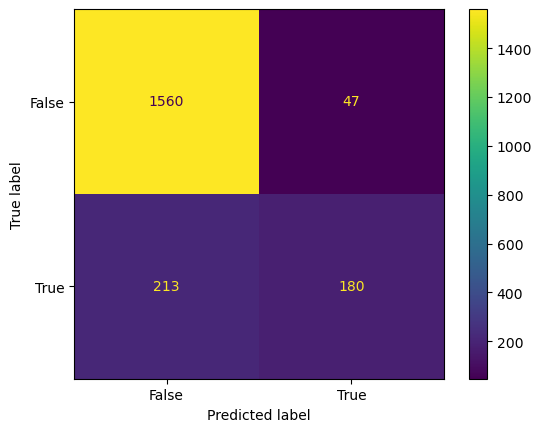

Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.79      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.87      0.86      2000



In [28]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", class_report)

AUC-ROC Score: 0.8612


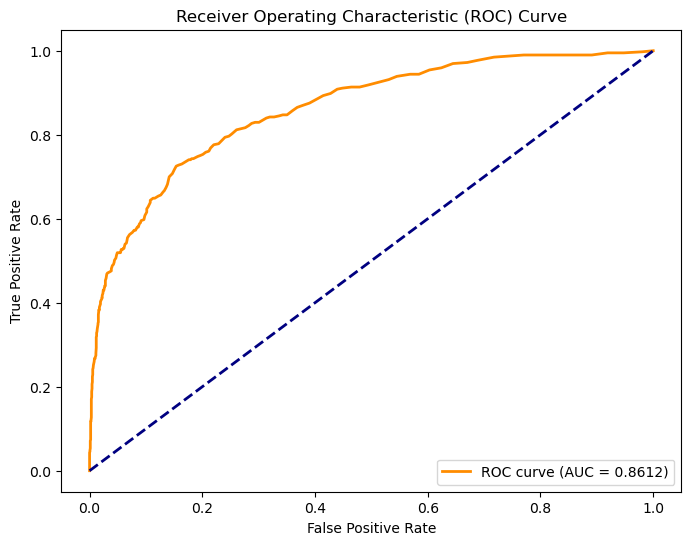

In [29]:
y_pred_proba = rf_model.predict_proba(x_test)[:, 1]

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC Score: {auc_roc:.4f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.4f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()